# House Prices - Advanced Regression Techniques
> Original code : [Advanced Regression Techniques(Regularization) by ALFRED](https://www.kaggle.com/code/alfredmaboa/advanced-regression-techniques-regularization#Start-Model-Building)

## Data field
#### **SalePrice: target($)**  

**MSSubClass** : The building class | **MSZoning** : The general zoning classification  
**LotFrontage** : Linear feet of street connected to property | **otArea** : Lot size in square feet | **LotShape** : General shape of property  
**Street** : Type of road access | **Alley** : Type of alley access  
**LandContour** : Flatness of the property | **Utilities** : Type of utilities available  
**LotConfig** : Lot configuration | **LandSlope** : Slope of property | **Neighborhood** : Physical locations within Ames city limits  
**Condition1** : Proximity to main road or railroad | **Condition2** : Proximity to main road or railroad (if a second is present)  
**BldgType** : Type of dwelling | **HouseStyle** : Style of dwelling  
**verallQua** : Overall material and finish quality | **OverallCond** : Overall condition rating  
**YearBuilt** : Original construction date | **YearRemodAdd** : Remodel date  
**RoofStyle** : Type of roof | **RoofMatl** : Roof material  
**Exterior1st** : Exterior covering on house | **Exterior2nd** : Exterior covering on house (if more than one material)  
**MasVnrType** : Masonry veneer type | **MasVnrArea** : Masonry veneer area in square feet  
**ExterQual** : Exterior material quality | **ExterCond** : Present condition of the material on the exterior  
**Foundation** : Type of foundation | **BsmtQual** : Height of the basement | **BsmtCond** : General condition of the basement  
**BsmtExposure** : Walkout or garden level basement walls | **BsmtFinType1** : Quality of basement finished area | **BsmtFinSF1** : Type 1 finished square feet  
**BsmtFinType2** : Quality of second finished area (if present) | **BsmtFinSF2** : Type 2 finished square feet | **BsmtUnfSF** : Unfinished square feet of basement area  
**TotalBsmtSF** : Total square feet of basement area | **Heating** : Type of heating | **HeatingQC** : Heating quality and condition  
**CentralAir** : Central air conditioning | **Electrical** : Electrical system  
**1stFlrSF** : First Floor square feet | **2ndFlrSF** : Second floor square feet  
**LowQualFinSF** : Low quality finished square feet (all floors) | **GrLivArea** : Above grade (ground) living area square feet  
**BsmtFullBath** : Basement full bathrooms | **BsmtHalfBath** : Basement half bathrooms  
**FullBath** : Full bathrooms above grade | **HalfBath** : Half baths above grade  
**Bedroom** : Number of bedrooms above basement level | **Kitchen** : Number of kitchens | **KitchenQual** : Kitchen quality  
**TotRmsAbvGrd** : Total rooms above grade (does not include bathrooms) | **Functional** : Home functionality rating | **Fireplaces** : Number of fireplaces  
**FireplaceQu** : Fireplace quality | **GarageType** : Garage location | **GarageYrBlt** : Year garage was built  
**GarageFinish** : Interior finish of the garage | **GarageCars** : Size of garage in car capacity | **GarageArea** : Size of garage in square feet  
**GarageQual** : Garage quality | **GarageCond** : Garage condition | **PavedDrive** : Paved driveway  
**WoodDeckSF** : Wood deck area in square feet | **OpenPorchSF** : Open porch area in square feet | **nclosedPorch** : Enclosed porch area in square feet  
**3SsnPorch** : Three season porch area in square feet | **ScreenPorch** : Screen porch area in square feet | **PoolArea** : Pool area in square feet  
**PoolQC** : Pool quality | **Fence** : Fence quality | **MiscFeature** : Miscellaneous feature not covered in other categories  
**MiscVal** : Value of miscellaneous feature | **MoSold** : Month Sold | **YrSold** : Year Sold  
**SaleType** : Type of sale | **SaleCondition** : Condition of sale

## 1. Import Libraries

In [1]:
# linear algebra, data handling, visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from datetime import datetime
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# modeling
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.pipeline import make_pipeline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings('ignore')

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


## 2. Import Dataset

In [2]:
train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

print("Shape of train :", train.shape)
print("Shape of test :", test.shape)

Shape of train : (1460, 81)
Shape of test : (1459, 80)


In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## 3. Data preprocessing

In [5]:
train_id = train['Id']
test_id = test['Id']

# drop the 'ID' column -> no need for training
train.drop(['Id'], axis = 1, inplace = True)
test.drop(['Id'], axis = 1, inplace = True)

In [6]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


- Distribution of the target to see if it fits a normal distribution,due to the parametric nature

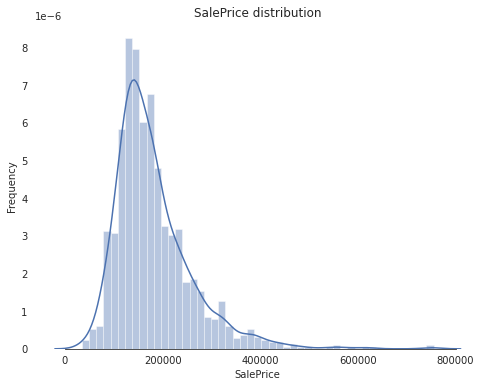

In [7]:
# Before normalization

sns.set_style("white")
sns.set_color_codes(palette = 'deep')
f, ax = plt.subplots(figsize = (8, 6))

sns.distplot(train['SalePrice'], color = 'b')
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")

sns.despine(trim=True, left=True)  # delete border
plt.show()

- skewed to the right
  - apply log(1+x) to all elements of the column which fixes the skeweness of the distribution.

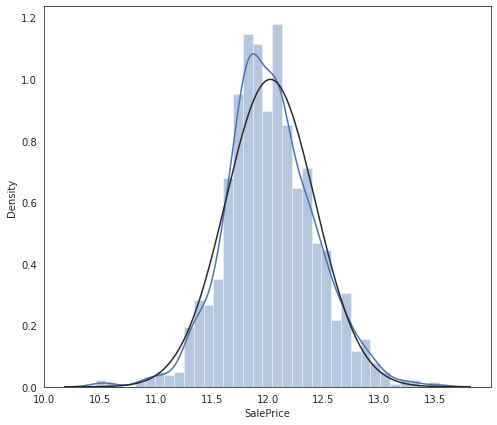

In [8]:
train["SalePrice"] = np.log1p(train["SalePrice"])

# new distribution
f, ax = plt.subplots(figsize=(8, 7))
sns.distplot(train['SalePrice'] , fit=norm, color="b");  # plotting with normal distribution (black line)

- Check fitted parameters of normal distribution

In [9]:
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))


 mu = 12.02 and sigma = 0.40



In [10]:
# target
y = train.SalePrice.reset_index(drop=True)
y

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

In [11]:
train_features = train.drop(['SalePrice'], axis=1)
test_features = test

# concatinate the train and the test set as features for tranformation to avoid mismatch
features = pd.concat([train_features, test_features]).reset_index(drop=True)

In [12]:
print('Features size:', features.shape)

Features size: (2919, 79)


## 4. Feature Engineering

### 4-(1). Missing values

In [13]:
# determining the threshold of missing values
def percent_missing(df):
    data = pd.DataFrame(df)
    df_cols = list(pd.DataFrame(data))
    dict_x = {}
    for i in range(0, len(df_cols)):
        dict_x.update({df_cols[i]: round(data[df_cols[i]].isnull().mean()*100,2)})
    
    return dict_x

missing = percent_missing(features)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss[0:10]

Percent of missing data


[('PoolQC', 99.66),
 ('MiscFeature', 96.4),
 ('Alley', 93.22),
 ('Fence', 80.44),
 ('FireplaceQu', 48.65),
 ('LotFrontage', 16.65),
 ('GarageYrBlt', 5.45),
 ('GarageFinish', 5.45),
 ('GarageQual', 5.45),
 ('GarageCond', 5.45)]

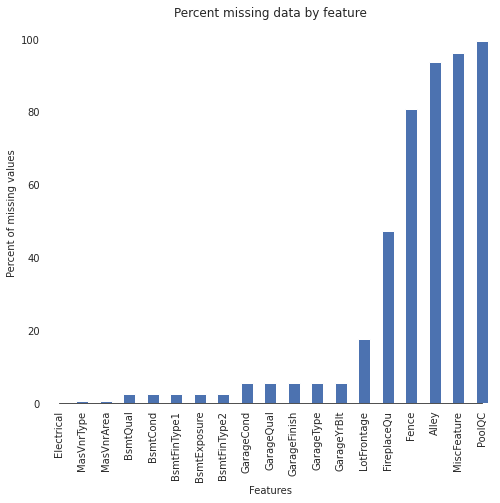

In [14]:
f, ax = plt.subplots(figsize=(8, 7))
missing = round(train.isnull().mean()*100,2)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color="b")

ax.xaxis.grid(False)
ax.set(ylabel="Percent of missing values")
ax.set(xlabel="Features")
ax.set(title="Percent missing data by feature")
sns.despine(trim=True, left=True)

In [15]:
# Some of the non-numeric predictors are stored as numbers --> we convert them into strings 
features['MSSubClass'] = features['MSSubClass'].apply(str)
features['YrSold'] = features['YrSold'].astype(str)
features['MoSold'] = features['MoSold'].astype(str)

# data description says NA means typical
features['Functional'] = features['Functional'].fillna('Typ')

# one NA value. We set 'SBrkr' (which is the most frequent)
features['Electrical'] = features['Electrical'].fillna("SBrkr")
# one NA value, We set 'TA' (which is the most frequent)
features['KitchenQual'] = features['KitchenQual'].fillna("TA")

# one NA value. We substitute in the most common string
features['Exterior1st'] = features['Exterior1st'].fillna(features['Exterior1st'].mode()[0])
features['Exterior2nd'] = features['Exterior2nd'].fillna(features['Exterior2nd'].mode()[0])

# Fill with most frequent one
features['SaleType'] = features['SaleType'].fillna(features['SaleType'].mode()[0])

# data description says NA means "No Pool" (majority of houses have no Pool at all in general.)
features["PoolQC"] = features["PoolQC"].fillna("None")

# Replacing missing data with 0 (Since No garage = no cars in such garage.)
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    features[col] = features[col].fillna(0)
    
# Replacing missing data with None
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    features[col] = features[col].fillna('None')
    
# For all these categorical basement-related features, NaN means that there is no basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    features[col] = features[col].fillna('None')

# Fill with most frequent 'RL'
features['MSZoning'] = features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

# group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
features['LotFrontage'] = features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

print('Features size:', features.shape)  # no change -> dropping X

Features size: (2919, 79)


In [16]:
features.isnull().sum().sum()

9360

In [17]:
# Filling the rest of the categorical features (String)
objects = []
for i in features.columns:
    if features[i].dtype == object:
        objects.append(i)
features.update(features[objects].fillna('None'))

In [18]:
# Filling in the rest of the NA's (numeric)
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics = []
for i in features.columns:
    if features[i].dtype in numeric_dtypes:
        numerics.append(i)
features.update(features[numerics].fillna(0))

In [19]:
# Check the remaining missing values
missing = percent_missing(features)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss[0:10]

Percent of missing data


[('MSSubClass', 0.0),
 ('MSZoning', 0.0),
 ('LotFrontage', 0.0),
 ('LotArea', 0.0),
 ('Street', 0.0),
 ('Alley', 0.0),
 ('LotShape', 0.0),
 ('LandContour', 0.0),
 ('Utilities', 0.0),
 ('LotConfig', 0.0)]

- No more missing values

### 4-(2). More feature engineering

In [20]:
# We need to find all numeric features in the data
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = []
for i in features.columns:
    if features[i].dtype in numeric_dtypes:
        numerics2.append(i)

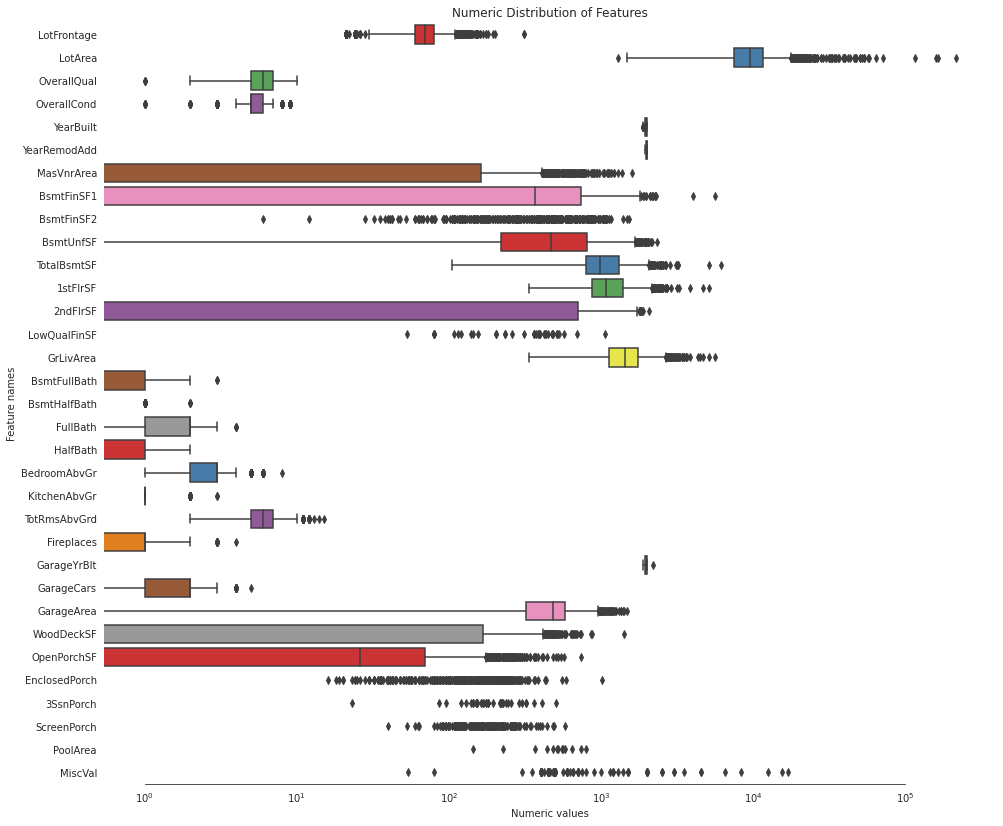

In [21]:
# Box plots for all our numeric features
f, ax = plt.subplots(figsize=(16, 14))
ax.set_xscale("log")

ax = sns.boxplot(data=features[numerics2] , orient="h", palette="Set1")

ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

- some data that is not normaly distributed (Skewed)

In [22]:
# Calculate the skewness
skew_features = features[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index
print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features.head(10)

There are 25 numerical features with Skew > 0.5 :


MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.146143
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.931594
dtype: float64

#### Box-cox transformation
- simple transformation that leads to normality.

In [23]:
for i in skew_index:
    features[i] = boxcox1p(features[i], boxcox_normmax(features[i] + 1))

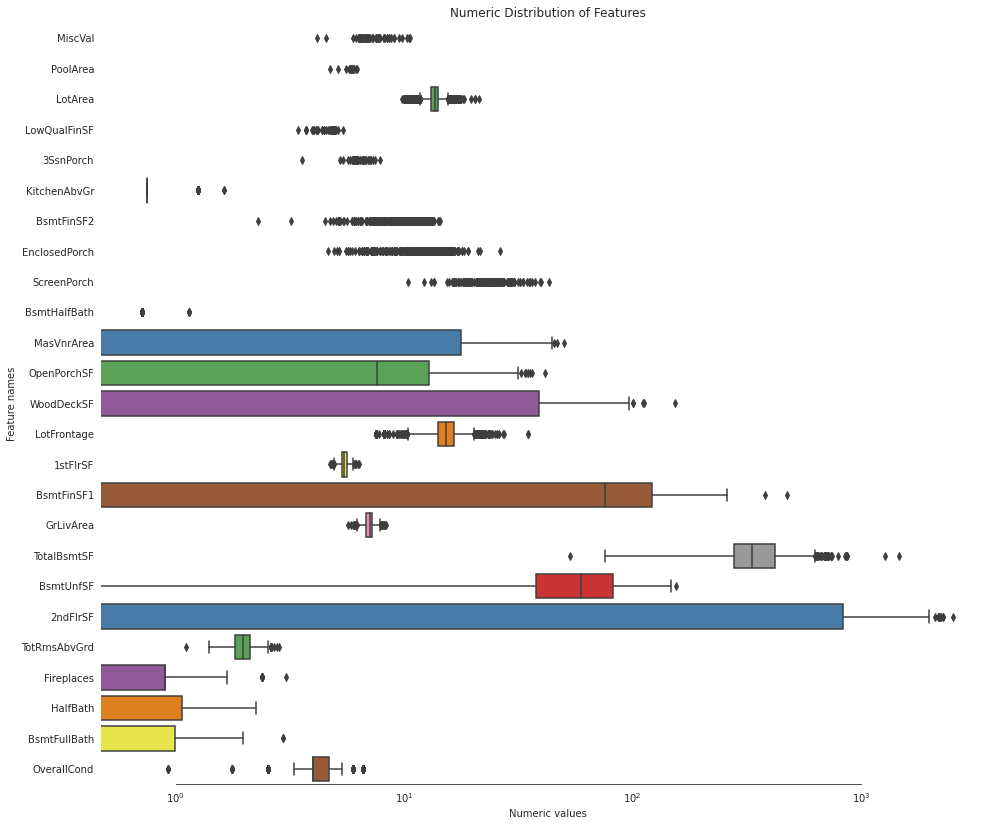

In [24]:
f, ax = plt.subplots(figsize=(16, 14))
ax.set_xscale("log")

ax = sns.boxplot(data=features[skew_index] , orient="h", palette="Set1")

ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

- `MasVnrArea`, `OpenPorchSF`, `WoodDeckSF`, `BsmtFinSF1`, `2ndFlrSF` could not be normalized -> dropping
  - Since `area` related features are very important to determine house prices
  - Add `total area of floors`, `bathrooms` and `porch area` before dropping  


- `MasVnrArea` : Masonry veneer area in square feet | `penPorchSF` : Open porch area in square feet
- `WoodDeckSF` : Wood deck area in square feet | `BsmtFinSF1` : Type 1 finished square feet

  

In [25]:
# Calculating totals before droping less significant columns

#  Adding total sqfootage feature 
features['TotalSF']=features['TotalBsmtSF'] + features['1stFlrSF'] + features['2ndFlrSF']

#  Adding total bathrooms feature
features['Total_Bathrooms'] = (features['FullBath'] + (0.5 * features['HalfBath']) +
                               features['BsmtFullBath'] + (0.5 * features['BsmtHalfBath']))
#  Adding total porch sqfootage feature
features['Total_porch_sf'] = (features['OpenPorchSF'] + features['3SsnPorch'] +
                              features['EnclosedPorch'] + features['ScreenPorch'] +
                              features['WoodDeckSF'])

In [26]:
# dropping
features = features.drop(['MasVnrArea', 'OpenPorchSF', 'WoodDeckSF', 'BsmtFinSF1','2ndFlrSF'], axis=1)

In [27]:
# Adding new simplified features (1 = present, 0 = not present)
features['haspool'] = features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
features['hasgarage'] = features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
features['hasbsmt'] = features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
features['hasfireplace'] = features['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

print('Features size:', features.shape)

Features size: (2919, 81)


In [28]:
# One-hot Encoding the finalized features
final_features = pd.get_dummies(features).reset_index(drop=True)

print('Features size after one-hot encoding:', final_features.shape)

Features size after one-hot encoding: (2919, 335)


In [29]:
features['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [30]:
final_features[['Street_Pave', 'Street_Grvl']].head()

,Street_Pave,Street_Grvl
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [31]:
# Spliting train and test

X = final_features.iloc[:len(y), :]
X_test = final_features.iloc[len(X):, :]

print('Shape of train X', X.shape)
print('Shape of train y', y.shape)
print('Shape of test X', X_test.shape)

Shape of train X (1460, 335)
Shape of train y (1460,)
Shape of test X (1459, 335)


In [32]:
# Removes colums where the threshold of zero's is (> 99.95), means has only zero values 

overfit = []
for i in X.columns:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 > 99.95:
        overfit.append(i)

overfit = list(overfit)
overfit.append('MSZoning_C (all)')

X = X.drop(overfit, axis=1).copy()
X_test = X_test.drop(overfit, axis=1).copy()

print('Shape of train X', X.shape)
print('Shape of train y', y.shape)
print('Shape of test X', X_test.shape)

Shape of train X (1460, 332)
Shape of train y (1460,)
Shape of test X (1459, 332)


## 5. Modeling

#### Ridge regression
- L2 penalty term.

#### Lasso regression
- L1 penalty term

#### Elastic net
- Ridge + Lasso
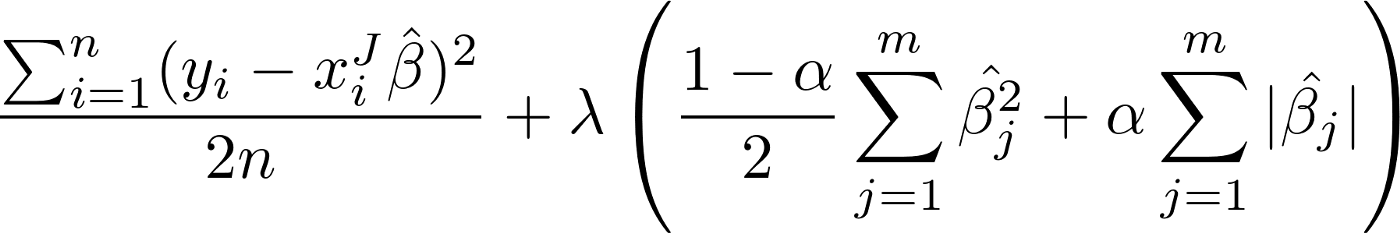
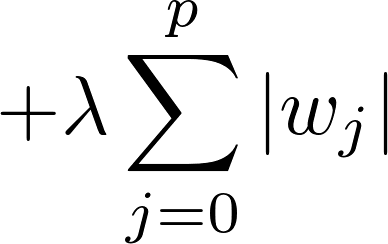
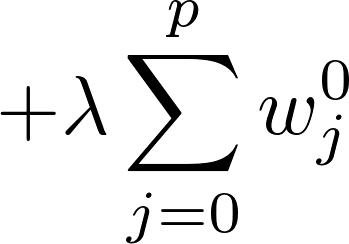
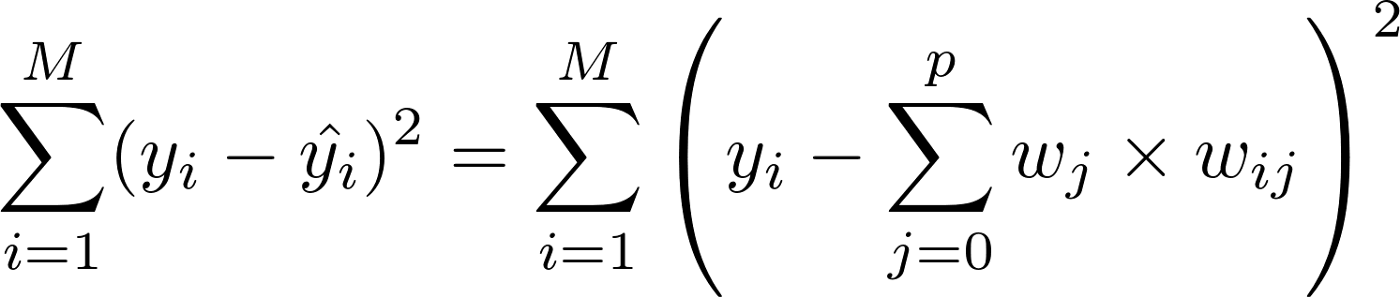

- kfolds Cross Validation function where K=10

In [33]:
kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

# model scoring and validation function
def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y,scoring="neg_mean_squared_error",cv=kfolds))
    return (rmse)

# rmsle scoring function
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

- RidgeCV, LassoCV, ElasticNetCV

In [34]:
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]


# Kernel Ridge Regression : made robust to outliers
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))

# LASSO Regression : made robust to outliers
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, 
                    alphas=alphas2,random_state=42, cv=kfolds))

# Elastic Net Regression : made robust to outliers
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, 
                         alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio))

# store models, scores and prediction values 
models = {'Ridge': ridge,
          'Lasso': lasso, 
          'ElasticNet': elasticnet}
predictions = {}
scores = {}

for name, model in models.items():
    
    model.fit(X, y)
    predictions[name] = np.expm1(model.predict(X))
    
    score = cv_rmse(model, X=X)
    scores[name] = (score.mean(), score.std())

- 10-fold stacking
  - we first split the training data into 10 folds. Then we will do 10 iterations. 
  - In each iteration, we train every base model on 9 folds and predict on the remaining fold (holdout fold).

In [35]:
# evaluation

print('---- Score with CV_RMSLE-----')

score = cv_rmse(ridge)
print("Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(elasticnet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

---- Score with CV_RMSLE-----
Ridge score: 0.1284 (0.0290)

Lasso score: 0.1264 (0.0311)

ElasticNet score: 0.1263 (0.0312)



In [36]:
# Fit the train dataset
print('----START Fit----',datetime.now())

print('Elasticnet')
elastic_model = elasticnet.fit(X, y)
print('Lasso')
lasso_model = lasso.fit(X, y)
print('Ridge')
ridge_model = ridge.fit(X, y)

----START Fit---- 2022-06-09 07:36:20.417144
Elasticnet
Lasso
Ridge


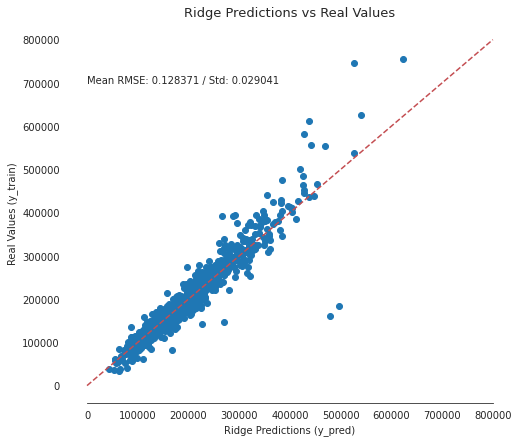

In [37]:
f, ax = plt.subplots(figsize=(8, 7))
sns.set_style("white")

model_name = 'Ridge'
plt.scatter(predictions[model_name], np.expm1(y))
plt.plot([0, 800000], [0, 800000], '--r')

plt.xlabel(model_name +' Predictions (y_pred)', size=10)
plt.ylabel('Real Values (y_train)', size=10)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

plt.title(model_name +' Predictions vs Real Values', size=13)
plt.text(0, 700000, 'Mean RMSE: {:.6f} / Std: {:.6f}'.format(scores[model_name][0], scores[model_name][1]), fontsize=10)
ax.xaxis.grid(False)
sns.despine(trim=True, left=True)
plt.show()

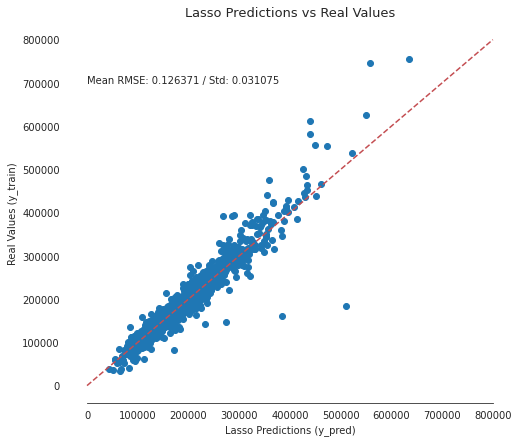

In [38]:
f, ax = plt.subplots(figsize=(8, 7))
sns.set_style("white")

model_name = 'Lasso'
plt.scatter(predictions[model_name], np.expm1(y))
plt.plot([0, 800000], [0, 800000], '--r')

plt.xlabel(model_name +' Predictions (y_pred)', size=10)
plt.ylabel('Real Values (y_train)', size=10)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

plt.title(model_name +' Predictions vs Real Values', size=13)
plt.text(0, 700000, 'Mean RMSE: {:.6f} / Std: {:.6f}'.format(scores[model_name][0], scores[model_name][1]), fontsize=10)
ax.xaxis.grid(False)
sns.despine(trim=True, left=True)
plt.show()

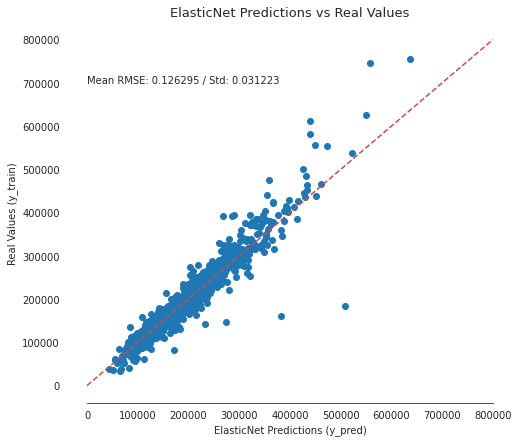

In [39]:
f, ax = plt.subplots(figsize=(8, 7))
sns.set_style("white")

model_name = 'ElasticNet'
plt.scatter(predictions[model_name], np.expm1(y))
plt.plot([0, 800000], [0, 800000], '--r')

plt.xlabel(model_name +' Predictions (y_pred)', size=10)
plt.ylabel('Real Values (y_train)', size=10)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

plt.title(model_name +' Predictions vs Real Values', size=13)
plt.text(0, 700000, 'Mean RMSE: {:.6f} / Std: {:.6f}'.format(scores[model_name][0], scores[model_name][1]), fontsize=10)
ax.xaxis.grid(False)
sns.despine(trim=True, left=True)
plt.show()

#### Ensemble prediction on blended models

In [40]:
def blend_models(X):
    return ((elastic_model.predict(X)) + (lasso_model.predict(X)) + (ridge_model.predict(X)))/3

blended_score = rmsle(y, blend_models(X))
print('RMSLE score on train data:')
print(rmsle(y, blend_models(X)))

RMSLE score on train data:
0.10732564753987454


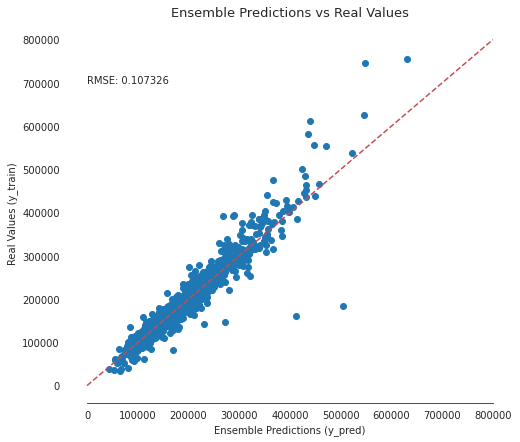

In [41]:
f, ax = plt.subplots(figsize=(8, 7))
sns.set_style("white")

plt.scatter(np.expm1(blend_models(X)), np.expm1(y))
plt.plot([0, 800000], [0, 800000], '--r')

plt.xlabel('Ensemble Predictions (y_pred)', size=10)
plt.ylabel('Real Values (y_train)', size=10)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

plt.title('Ensemble Predictions vs Real Values', size=13)
plt.text(0, 700000, 'RMSE: {:.6f}'.format(rmsle(y, blend_models(X))), fontsize=10)
ax.xaxis.grid(False)
sns.despine(trim=True, left=True)
plt.show()

In [42]:
y_test_r = pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")
submission = pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")

y_test = np.log1p(y_test_r.iloc[:,1].values)
submission.iloc[:,1] = np.expm1(blend_models(X_test))
blended_score = rmsle(y_test, blend_models(X_test))

In [43]:
submission.head()

,Id,SalePrice
0,1461,115004.373773
1,1462,155098.177997
2,1463,180282.069020
3,1464,201217.041174
4,1465,199866.414664


In [44]:
submission.to_csv("submission.csv", index=False)